<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/04pln/49_ex_0505_trabajo_en_clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0505

In [1]:
# Install Tweepy once.
!pip install tweepy

In [2]:
import tweepy
import re
import os
import pickle
import nltk
from nltk.corpus import stopwords
from tweepy import OAuthHandler

### 1. Fetching tweets from Twitter:
More information can be found [here](http://docs.tweepy.org/en/v3.5.0/index.html).

In [3]:
# PLEASE FILL IN WITH YOUR OWN API KEYS!
my_consumer_key = "wdsQLm8uW9AJZRwO6vw4mCrq9"
my_consumer_secret = "X6sLxmuV9PGNmPkSPoQ5GqBR5qMN4SCuSuWcRl3LOCwBCiMR3H"
my_access_token = "96799633-1fu8Zbd6SzCfLfd6ii7pG6I8pUg3y94MG6Aeh63yH"
my_access_secret = "kgld8c759oZWk3XGRMzdZDvJYRRkXSQ61mEnJ0T6VtnRr"

In [4]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAJ4AtgEAAAAAKtj55x0MCkbjzJUZl7dfFQNbEWQ%3Dfr3Q0r3Us73oLmbirnBOeqHLYg52AOibqGau2zuIEbxJ2ufgn7"

In [5]:
clien_secret = "NgGPFa8gfJXg3kS1yn4mNPZBWClFmaY4zjVZ30kRZrNcZEUGi3"

In [6]:
# Initialize the tokens.
auth = OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_secret)

In [14]:
import tweepy

# Reemplaza esto con tu token real

client = tweepy.Client(bearer_token=bearer_token)

my_keyword = "Chile"

query = my_keyword + " -is:retweet lang:en"

response = client.search_recent_tweets(
    query=query,
    max_results=50,
    tweet_fields=["text", "created_at", "author_id"]
)

my_tweets = [tweet.text for tweet in response.data] if response.data else []

for tweet in my_tweets:
    print(tweet)


🌍 Building futures across three continents!

🇨🇱 Chile: 489 entrepreneurs supported through Emprende Alto
🇺🇸 Nevada: $5.4 million invested in the Newa Numa Scholarship Fund to provide Native American students with access to higher education and career opportunities
🇨🇩 DRC: Local https://t.co/XKVcz7Cr2h
@ursidays Chile..
@KollegeKidd I mean tf lol 😆 he could’ve popped you asking that dumb ass shit 💩 and I don’t even like his little pony girlfriend but chile woo
@svperstarism the background activites chile- https://t.co/no35BQFGmw
cr @volcanodiscover
Part 1 Earthquakes
As of 26 July 2025 2058SGT (GMT+8), 2484 quakes happened with 1997 reports submitted

🇹🇼Taiwan (1927SGT): M3.5
🇷🇺Russia: M4.3
🇮🇳India: M3.9
🇳🇿New Zealand: M3.4
🇨🇱Chile: M3.1
Latin America largely has no role in WW2, so they aren’t taught to have crippling guilt about it the way white countries are. Same reason the average white person can tell you who FDR, Churchill and Hitler were but couldn’t tell you who led Chile in 193

In [6]:
my_keyword = "Trump"                           # Search keyword.
my_location = "-33.45,-70.66,500km"               # Location = latitude, longitude, radius.
n_tweets = 10                                 # Maximum number of tweets.

In [7]:
my_tweets = []
api = tweepy.API(auth, timeout = 10)           # Timeout after 10 seconds.
for status in tweepy.Cursor(api.search, q = my_keyword + " -filter:retweets", lang="en", result_type="recent", geocode=my_location).items(n_tweets):
  my_tweets.append(status.text)

AttributeError: 'API' object has no attribute 'search'

In [10]:
my_tweets = []
api = tweepy.API(auth, timeout=10)

for status in tweepy.Cursor(
    api.search_tweets,
    q=my_keyword + " -filter:retweets",
    lang="en",
    result_type="recent",
    geocode=my_location
).items(n_tweets):
    my_tweets.append(status.text)


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [15]:
print('\n'.join(my_tweets))

🌍 Building futures across three continents!

🇨🇱 Chile: 489 entrepreneurs supported through Emprende Alto
🇺🇸 Nevada: $5.4 million invested in the Newa Numa Scholarship Fund to provide Native American students with access to higher education and career opportunities
🇨🇩 DRC: Local https://t.co/XKVcz7Cr2h
@ursidays Chile..
@KollegeKidd I mean tf lol 😆 he could’ve popped you asking that dumb ass shit 💩 and I don’t even like his little pony girlfriend but chile woo
@svperstarism the background activites chile- https://t.co/no35BQFGmw
cr @volcanodiscover
Part 1 Earthquakes
As of 26 July 2025 2058SGT (GMT+8), 2484 quakes happened with 1997 reports submitted

🇹🇼Taiwan (1927SGT): M3.5
🇷🇺Russia: M4.3
🇮🇳India: M3.9
🇳🇿New Zealand: M3.4
🇨🇱Chile: M3.1
Latin America largely has no role in WW2, so they aren’t taught to have crippling guilt about it the way white countries are. Same reason the average white person can tell you who FDR, Churchill and Hitler were but couldn’t tell you who led Chile in 193

### 2. Pre-processing the tweets:

In [ ]:
# my_tweets_new = []
# for tweet in my_tweets:
#     tweet = tweet.lower()
#     tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
#     tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
#     tweet = re.sub(r"that's","that is",tweet)
#     tweet = re.sub(r"there's","there is",tweet)
#     tweet = re.sub(r"what's","what is",tweet)
#     tweet = re.sub(r"where's","where is",tweet)
#     tweet = re.sub(r"it's","it is",tweet)
#     tweet = re.sub(r"who's","who is",tweet)
#     tweet = re.sub(r"i'm","i am",tweet)
#     tweet = re.sub(r"she's","she is",tweet)
#     tweet = re.sub(r"he's","he is",tweet)
#     tweet = re.sub(r"they're","they are",tweet)
#     tweet = re.sub(r"who're","who are",tweet)
#     tweet = re.sub(r"ain't","am not",tweet)
#     tweet = re.sub(r"wouldn't","would not",tweet)
#     tweet = re.sub(r"shouldn't","should not",tweet)
#     tweet = re.sub(r"can't","can not",tweet)
#     tweet = re.sub(r"couldn't","could not",tweet)
#     tweet = re.sub(r"won't","will not",tweet)
#     tweet = re.sub(r"\W"," ",tweet)
#     tweet = re.sub(r"\d"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+[a-z]$"," ",tweet)
#     tweet = re.sub(r"^[a-z]\s+"," ",tweet)
#     tweet = re.sub(r"\s+"," ",tweet)
#     words = nltk.word_tokenize(tweet)
#     words = [x for x in words if x not in stopwords.words('english')]
#     tweet = ' '.join(words)
#     my_tweets_new.append(tweet)

In [ ]:
# # Print out the tweets.
# i = 0
# for tw in my_tweets_new:
#     i += 1
#     print(str(i) + " : " + tw)

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Asegúrate de tener esto antes
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


my_tweets_new = []

for tweet in my_tweets:
    tweet = tweet.lower()

    # Eliminar URLs
    tweet = re.sub(r'https?://\S+', '', tweet)

    # Expandir contracciones comunes manualmente
    contractions = {
        "that's": "that is", "there's": "there is", "what's": "what is",
        "where's": "where is", "it's": "it is", "who's": "who is",
        "i'm": "i am", "she's": "she is", "he's": "he is",
        "they're": "they are", "who're": "who are", "ain't": "am not",
        "wouldn't": "would not", "shouldn't": "should not", "can't": "can not",
        "couldn't": "could not", "won't": "will not"
    }

    for k, v in contractions.items():
        tweet = re.sub(r'\b' + k + r'\b', v, tweet)

    # Quitar caracteres especiales, números y múltiples espacios
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    # Tokenizar
    words = word_tokenize(tweet)

    # Eliminar stopwords
    words = [w for w in words if w not in stopwords.words('english')]

    # Volver a unir
    tweet_clean = ' '.join(words)

    my_tweets_new.append(tweet_clean)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [18]:
for i, tw in enumerate(my_tweets_new, start=1):
    print(f"{i} : {tw}")


1 : building futures across three continents chile entrepreneurs supported emprende alto nevada million invested newa numa scholarship fund provide native american students access higher education career opportunities drc local
2 : ursidays chile
3 : kollegekidd mean tf lol couldve popped asking dumb ass shit dont even like little pony girlfriend chile woo
4 : svperstarism background activites chile
5 : cr volcanodiscover part earthquakes july sgt gmt quakes happened reports submitted taiwan sgt russia india new zealand chile
6 : latin america largely role ww arent taught crippling guilt way white countries reason average white person tell fdr churchill hitler couldnt tell led chile
7 : shoestoodirty haroldliriano howiedoo wigginswick thedunkcentral oh lord really chile thing begging get roasted im taking bait lol
8 : katsewon baby u blocked hr ago unblocked spew u telling im ranting chile
9 : tevincskloset big mama hustling chile
10 : chile segunda division real juventud san joaquin a

In [19]:
from collections import Counter

all_words = ' '.join(my_tweets_new).split()
word_counts = Counter(all_words)

print(word_counts.most_common(10))


[('chile', 48), ('like', 5), ('im', 4), ('lol', 3), ('u', 3), ('calling', 3), ('higher', 2), ('local', 2), ('asking', 2), ('sgt', 2)]


In [ ]:
# El orden de los tweets es equivalente a:
# https://x.com/search?q=chile%20lang:en&src=typed_query&f=live

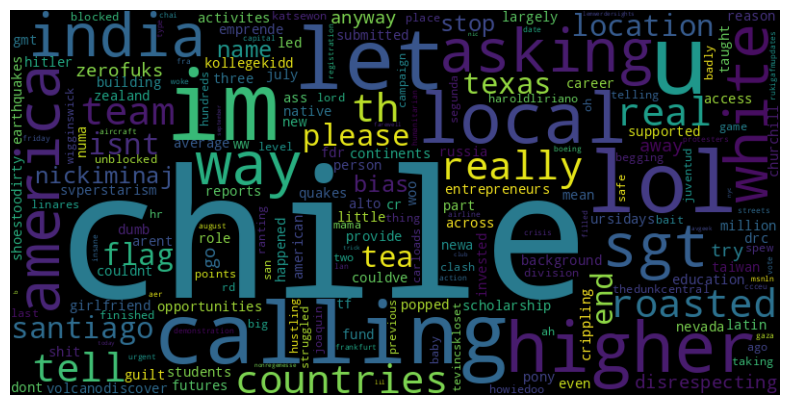

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(my_tweets_new)
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [21]:
from textblob import TextBlob

for tweet in my_tweets_new:
    sentiment = TextBlob(tweet).sentiment.polarity
    print(tweet, " --> Sentiment:", sentiment)


building futures across three continents chile entrepreneurs supported emprende alto nevada million invested newa numa scholarship fund provide native american students access higher education career opportunities drc local  --> Sentiment: 0.08333333333333333
ursidays chile  --> Sentiment: 0.0
kollegekidd mean tf lol couldve popped asking dumb ass shit dont even like little pony girlfriend chile woo  --> Sentiment: -0.05499999999999999
svperstarism background activites chile  --> Sentiment: 0.0
cr volcanodiscover part earthquakes july sgt gmt quakes happened reports submitted taiwan sgt russia india new zealand chile  --> Sentiment: 0.13636363636363635
latin america largely role ww arent taught crippling guilt way white countries reason average white person tell fdr churchill hitler couldnt tell led chile  --> Sentiment: 0.01607142857142857
shoestoodirty haroldliriano howiedoo wigginswick thedunkcentral oh lord really chile thing begging get roasted im taking bait lol  --> Sentiment: 0

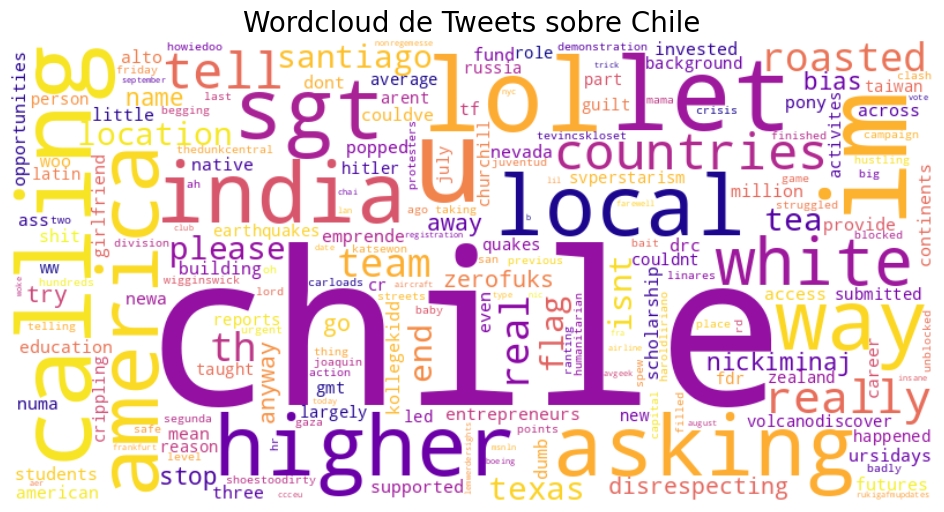

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto combinado de todos los tweets
text = ' '.join(my_tweets_new)

# Crear la wordcloud con parámetros para un mejor diseño
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # fondo blanco, típico de ggplot
    colormap='plasma',         # paleta de colores estilo ggplot (puedes probar 'viridis', 'plasma', 'magma')
    contour_color='black',     # contorno negro para mejor definición
    contour_width=1
).generate(text)

# Aplicar estilo ggplot de matplotlib
plt.style.use('ggplot')

# Mostrar la wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud de Tweets sobre Chile", fontsize=20)
plt.show()


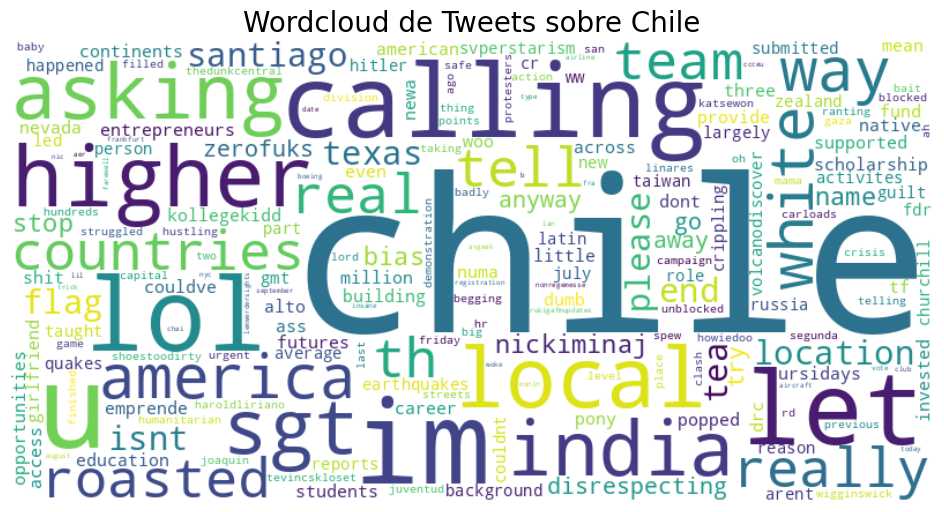

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto combinado de todos los tweets
text = ' '.join(my_tweets_new)

# Crear la wordcloud con parámetros para un mejor diseño
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # fondo blanco, típico de ggplot
    colormap='viridis',         # paleta de colores estilo ggplot (puedes probar 'viridis', 'plasma', 'magma')
    contour_color='black',     # contorno negro para mejor definición
    contour_width=1
).generate(text)

# Aplicar estilo ggplot de matplotlib
plt.style.use('ggplot')

# Mostrar la wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud de Tweets sobre Chile", fontsize=20)
plt.show()


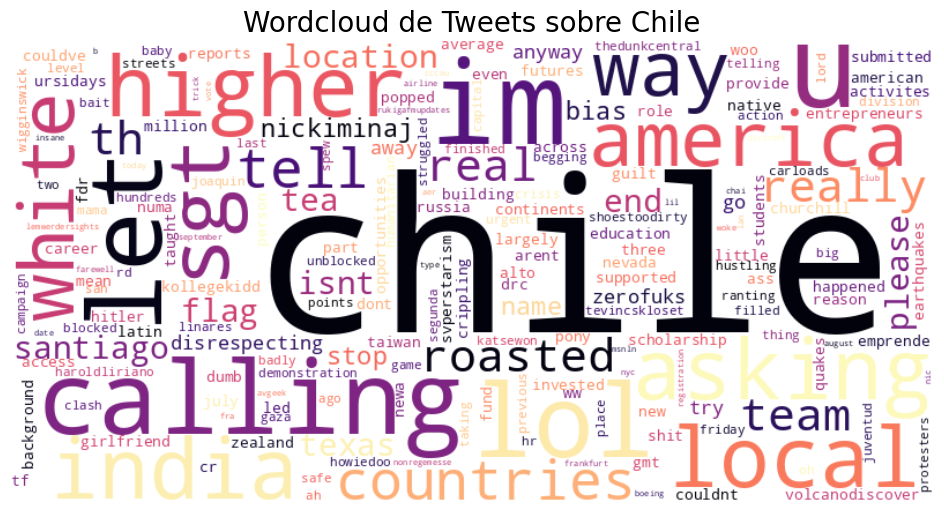

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto combinado de todos los tweets
text = ' '.join(my_tweets_new)

# Crear la wordcloud con parámetros para un mejor diseño
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # fondo blanco, típico de ggplot
    colormap='magma',         # paleta de colores estilo ggplot (puedes probar 'viridis', 'plasma', 'magma')
    contour_color='black',     # contorno negro para mejor definición
    contour_width=1
).generate(text)

# Aplicar estilo ggplot de matplotlib
plt.style.use('ggplot')

# Mostrar la wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud de Tweets sobre Chile", fontsize=20)
plt.show()

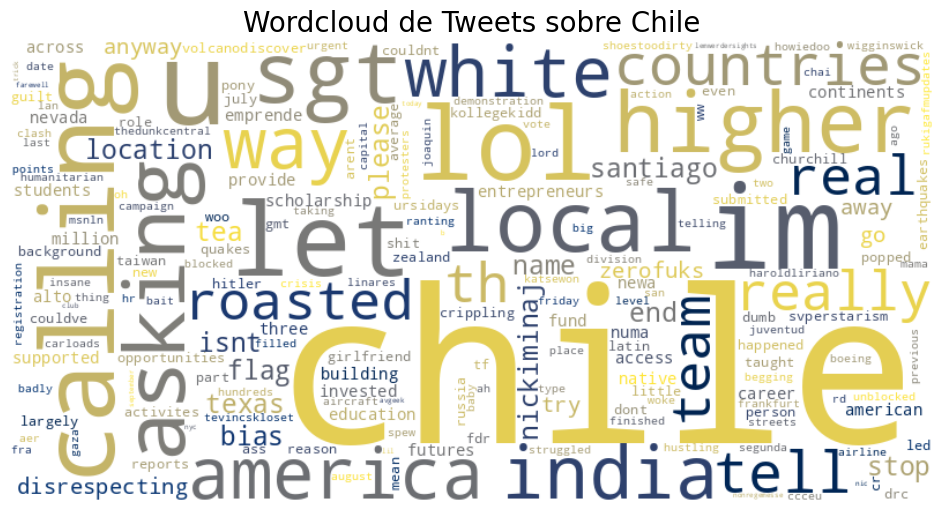

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto combinado de todos los tweets
text = ' '.join(my_tweets_new)

# Crear la wordcloud con parámetros para un mejor diseño
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',  # fondo blanco, típico de ggplot
    colormap='cividis',         # paleta de colores estilo ggplot (puedes probar 'viridis', 'plasma', 'magma')
    contour_color='black',     # contorno negro para mejor definición
    contour_width=1
).generate(text)

# Aplicar estilo ggplot de matplotlib
plt.style.use('ggplot')

# Mostrar la wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud de Tweets sobre Chile", fontsize=20)
plt.show()

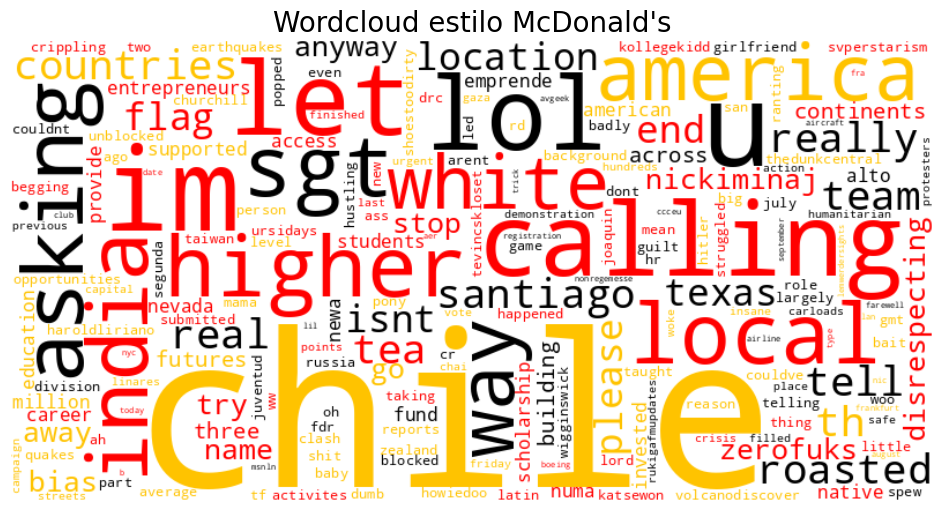

In [26]:
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def mcd_colors(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#FF0000", "#FFC300", "#000000"]  # rojo, amarillo McD, negro
    return random.choice(colors)

text = ' '.join(my_tweets_new)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    contour_color='black',
    contour_width=1
).generate(text)

plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(color_func=mcd_colors), interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud estilo McDonald's", fontsize=20)
plt.show()


In [7]:
# Asegúrate de tener esto antes
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Distintas paletas de colores para la nube de palabras
# https://kristendavis27.medium.com/wordcloud-style-guide-2f348a03a7f8

In [10]:
import tweepy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

In [9]:
client = tweepy.Client(bearer_token=bearer_token)
# 3. Define la palabra clave para buscar y el idioma español
my_keyword = "La Velada"
query = my_keyword + " -is:retweet lang:es"

# 4. Hacer la búsqueda de tweets recientes (máximo 50)
response = client.search_recent_tweets(
    query=query,
    max_results=50,
    tweet_fields=["text", "created_at", "author_id"]
)

# 5. Extraer textos de tweets
my_tweets = [tweet.text for tweet in response.data] if response.data else []

# 6. Mostrar tweets originales
print("Tweets originales:\n")
for i, tweet in enumerate(my_tweets, start=1):
    print(f"{i}: {tweet}\n")

# --- PROCESAMIENTO DE TEXTO ---

# Función para limpiar y normalizar tweets
def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+', '', tweet)    # Quitar URLs
    tweet = re.sub(r'@\w+', '', tweet)             # Quitar menciones
    tweet = re.sub(r'#\w+', '', tweet)             # Quitar hashtags
    tweet = re.sub(r'[^a-záéíóúüñ\s]', '', tweet)  # Quitar caracteres especiales (con acentos)
    tweet = re.sub(r'\s+', ' ', tweet).strip()     # Quitar espacios extras

    # Tokenizar
    palabras = word_tokenize(tweet, language='spanish')

    # Quitar stopwords en español
    palabras = [p for p in palabras if p not in stopwords.words('spanish')]

    return ' '.join(palabras)

# Limpiar todos los tweets
my_tweets_limpios = [limpiar_tweet(tw) for tw in my_tweets]

# Mostrar tweets limpios
print("\nTweets limpios:\n")
for i, tweet in enumerate(my_tweets_limpios, start=1):
    print(f"{i}: {tweet}")

# --- GENERAR WORDCLOUD ---

# Texto combinado de tweets limpios
texto_combinado = ' '.join(my_tweets_limpios)

# Crear WordCloud básica
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='inferno'  # Puedes cambiar a otra paleta si quieres
).generate(texto_combinado)

# Mostrar WordCloud
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Wordcloud de tweets sobre '{my_keyword}'", fontsize=20)
plt.show()

Tweets originales:

1: yo hoy opinando de la velada como si supiera algo de boxeo https://t.co/aO1jq4ccKf

2: @suja_gg Toda la razón, sin duda la mejor Velada y encima, Rosa

3: @lentilogia sevilla de por si está llena de pijos y fachas imagina sumarles el público promedio de la velada lo veo complicado

4: Ya conocemos la lista completa de ganadores de los Premios Eisner 2025, entregados la pasada noche en la San Diego Comic‑Con. 

Gene Luen Yang fue el gran nombre de la velada y ojo, que @Akira_Comics hizo su parte como representante patrio.

https://t.co/UduJkWnsLD

5: Cuando pensé que nada me daría más miedo que la gente que es aficionada de un equipo de la kins lig, aparecen de la nada los engendros que animan incondicionalmente a algún peleador de la velada para darme la lección de humildad de mi vida

6: quien para ver la charcada (velada) del año ??? 😭🤌 x discord

7: 📢 La Velada del Año 5 de Ibai en Sevilla 🇪🇸: 7 combates entre streamers de 🇪🇸🇲🇽🇦🇷🇨🇴, música en vivo y transmisió

NameError: name 'word_tokenize' is not defined

Tweets originales:

1: yo hoy opinando de la velada como si supiera algo de boxeo https://t.co/aO1jq4ccKf

2: @suja_gg Toda la razón, sin duda la mejor Velada y encima, Rosa

3: @lentilogia sevilla de por si está llena de pijos y fachas imagina sumarles el público promedio de la velada lo veo complicado

4: Ya conocemos la lista completa de ganadores de los Premios Eisner 2025, entregados la pasada noche en la San Diego Comic‑Con. 

Gene Luen Yang fue el gran nombre de la velada y ojo, que @Akira_Comics hizo su parte como representante patrio.

https://t.co/UduJkWnsLD

5: Cuando pensé que nada me daría más miedo que la gente que es aficionada de un equipo de la kins lig, aparecen de la nada los engendros que animan incondicionalmente a algún peleador de la velada para darme la lección de humildad de mi vida

6: quien para ver la charcada (velada) del año ??? 😭🤌 x discord

7: 📢 La Velada del Año 5 de Ibai en Sevilla 🇪🇸: 7 combates entre streamers de 🇪🇸🇲🇽🇦🇷🇨🇴, música en vivo y transmisió

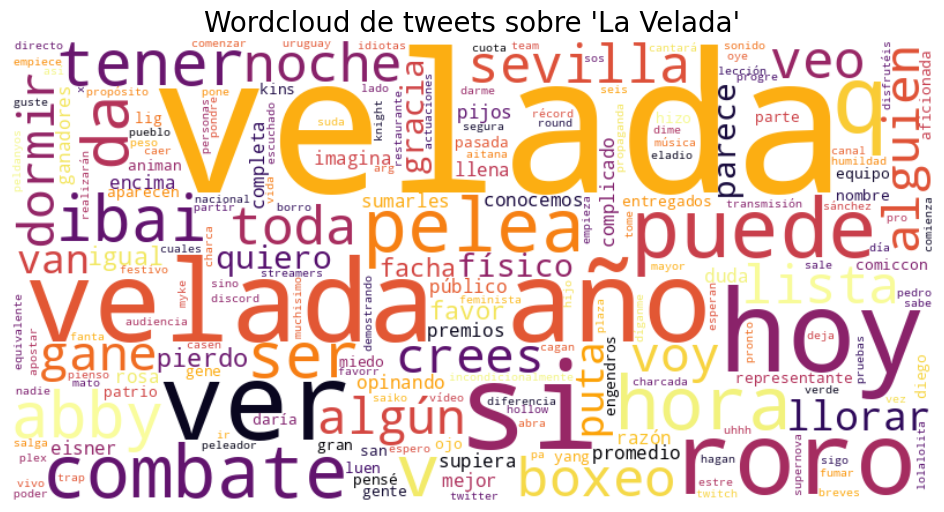

In [11]:
# 6. Mostrar tweets originales
print("Tweets originales:\n")
for i, tweet in enumerate(my_tweets, start=1):
    print(f"{i}: {tweet}\n")

# --- PROCESAMIENTO DE TEXTO ---

# Función para limpiar y normalizar tweets
def limpiar_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+', '', tweet)    # Quitar URLs
    tweet = re.sub(r'@\w+', '', tweet)             # Quitar menciones
    tweet = re.sub(r'#\w+', '', tweet)             # Quitar hashtags
    tweet = re.sub(r'[^a-záéíóúüñ\s]', '', tweet)  # Quitar caracteres especiales (con acentos)
    tweet = re.sub(r'\s+', ' ', tweet).strip()     # Quitar espacios extras

    # Tokenizar
    palabras = word_tokenize(tweet, language='spanish')

    # Quitar stopwords en español
    palabras = [p for p in palabras if p not in stopwords.words('spanish')]

    return ' '.join(palabras)

# Limpiar todos los tweets
my_tweets_limpios = [limpiar_tweet(tw) for tw in my_tweets]

# Mostrar tweets limpios
print("\nTweets limpios:\n")
for i, tweet in enumerate(my_tweets_limpios, start=1):
    print(f"{i}: {tweet}")

# --- GENERAR WORDCLOUD ---

# Texto combinado de tweets limpios
texto_combinado = ' '.join(my_tweets_limpios)

# Crear WordCloud básica
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='inferno'  # Puedes cambiar a otra paleta si quieres
).generate(texto_combinado)

# Mostrar WordCloud
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Wordcloud de tweets sobre '{my_keyword}'", fontsize=20)
plt.show()

In [12]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [1]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

# Si no descargaste estos recursos:
nltk.download('punkt')
nltk.download('stopwords')

# Supongamos que ya tienes tus tweets limpios en la lista `my_tweets_limpios`

# 1. Preprocesamiento adicional para LDA: tokenizar cada tweet
def preprocess(tweet):
    # Tokenizar en español
    return [word for word in word_tokenize(tweet, language='spanish') if word not in stopwords.words('spanish')]

texts = [preprocess(tweet) for tweet in my_tweets_limpios]

# 2. Crear diccionario de términos
dictionary = corpora.Dictionary(texts)

# 3. Convertir textos a formato bag-of-words (document-term matrix)
corpus = [dictionary.doc2bow(text) for text in texts]

# 4. Crear modelo LDA (ajusta num_topics para el número de temas que quieres)
num_topics = 3
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# 5. Mostrar los temas encontrados
for idx, topic in lda_model.print_topics(-1):
    print(f"Tema {idx + 1}:")
    print(topic)
    print()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'my_tweets_limpios' is not defined

In [ ]:
for i, bow in enumerate(corpus):
    topics_per_tweet = lda_model.get_document_topics(bow)
    top_topic = sorted(topics_per_tweet, key=lambda x: x[1], reverse=True)[0]
    print(f"Tweet {i+1}: tema {top_topic[0] + 1} con probabilidad {top_topic[1]:.2f}")
    print(my_tweets_limpios[i])
    print()
